# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Question

> How can a US insurance company determine the top 10 cities where its clients have the highest annual income for persons aged 40 and below? 

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [10]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/MedicalCitiesIncomeDataset
#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


dataset = pd.read_csv("http://bit.ly/MedicalCitiesIncomeDataset")
dataset.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
#procedure 1

len(dataset.index)

#procedure 2 

dataset.shape[0]

#procedure 3

dataset[dataset.columns[0]].count()

150000

In [8]:
# Previewing the top of our dataset
#

dataset.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [9]:
# Previewing the bottom of our dataset
# 

dataset.tail(5)

,Number,City,Gender,Age,Income,Illness
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No
149999,150000,Austin,Female,37,87251.0,No


In [11]:
# Checking whether each column has an appropriate datatype
#

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

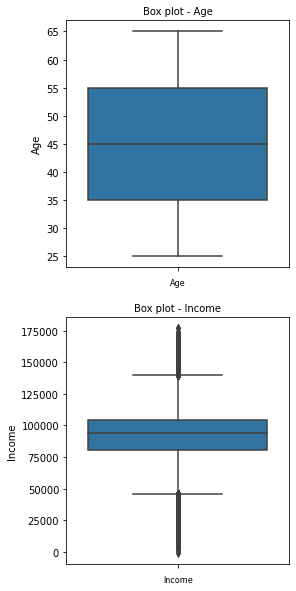

In [62]:
# Checking for Outliers
#

col_names = ['Age', 'Income']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=dataset[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


In [40]:
# removing outliers



age_upper = dataset['Age'].mean() + 3*dataset['Age'].std()
age_lower = dataset['Age'].mean() - 3*dataset['Age'].std()

df = dataset[(dataset['Age']< age_upper) & (dataset['Age']> age_lower)]
df
# new_df= df[(df.Weight<upper) & (df.Weight>lower)]

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [42]:
# removing outliers in all columns
def remove(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    return df 

# remove(dataset, 'Income')

clmns = ['Age', 'Income']

for c in clmns:

    new = remove(dataset, c)
    
new

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [43]:
# Checking for Anomalies
#
clmns = ['Age', 'Income']

for c in clmns:

    new = remove(dataset, c)
    
new

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [73]:
# Identifying the Missing Data
#

new.isna().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [ ]:
# Dealing with the Missing Data
#

In [74]:
# More data cleaning procedures
#

new.duplicated().sum()

0

## 6. Exploratory Analysis

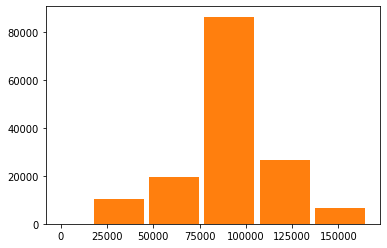

In [75]:
# Ploting the univariate summaries and recording our observations
#

def plot(data, col):
    fig = plt.hist(data[col], bins= 5, histtype='bar', rwidth=0.9)
    return fig

columnames = ['Age', 'Income']
for i in columnames:
    plot(new, i)



  Illness  Number
0      No  137726
1     Yes   12128


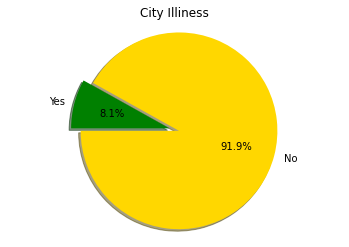

In [76]:
# Pie chart

dataset_illiness = new.groupby('Illness').count()['Number'].reset_index()
print(dataset_illiness)
illy = dataset_illiness['Illness']
numbers = dataset_illiness['Number']
explode = (0.1, 0)  
color = ['gold', 'green']

plt.pie(numbers, explode=explode, labels = illy, colors=color, autopct = '%1.1f%%', shadow = True, startangle = 180)


plt.axis('equal')
plt.title('City Illiness')
plt.show()

## 7. Implementing the Solution

In [77]:
# Implementing the Solution
# 
#Quiz:
#How can a US insurance company determine the top 10 cities 
#where its clients have the highest annual income for persons aged 40 and below? 

new[new['Age']< 40].groupby('City')['Income'].mean().sort_values(ascending=False).reset_index().head(5)

,City,Income
0,Mountain View,134942.417152
1,San Diego,101310.862089
2,New York City,96959.705119
3,Los Angeles,95312.372223
4,Boston,91188.900740


## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [78]:
# Reviewing the Solution 
#

new[new['Age']< 40].groupby('City')['Number'].count().sort_values(ascending=False).reset_index().head(5)

,City,Number
0,New York City,18343
1,Los Angeles,11614
2,Dallas,7027
3,Mountain View,5154
4,Austin,4590


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

# b). Do we need other data to answer our question?

### c). Did we have the right question?